In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

C:\Users\paho\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load the dummy data and take a quick look around

In [2]:
data = pd.read_csv('../data/midsize_dummy_preprocessed.csv')

In [3]:
data.head()

,speed,temp,duration,sequence,distance,rel_altitude,rel_soc
0,25.570312,-0.661392,0,1,0.000000,0.000000,-0.000000
1,27.574219,-0.677215,5,1,0.040666,-0.696062,0.096667
2,30.535156,-0.693038,10,1,0.092468,-1.234818,0.196667
3,31.160156,-0.708861,15,1,0.142041,-1.711705,0.283333
4,34.199219,-0.724684,20,1,0.186323,-3.369781,0.376667


In [4]:
len(data)

100000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194F114F550>,
      dtype=object)

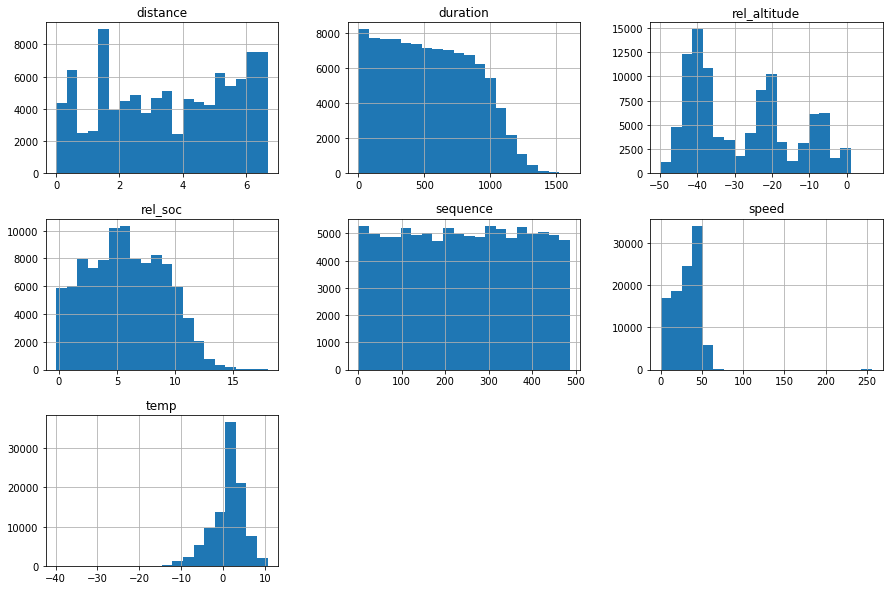

In [5]:
data.hist(bins=20, figsize=(15,10))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
speed           100000 non-null float64
temp            100000 non-null float64
duration        100000 non-null int64
sequence        100000 non-null int64
distance        100000 non-null float64
rel_altitude    100000 non-null float64
rel_soc         100000 non-null float64
dtypes: float64(5), int64(2)
memory usage: 5.3 MB


In [7]:
data.describe()

,speed,temp,duration,sequence,distance,rel_altitude,rel_soc
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,30.574375,1.219536,544.320280,242.88223,3.563416,-27.932265,5.776295
std,16.407098,4.032229,334.857363,139.85154,2.026561,13.496711,3.282041
min,0.000000,-39.849462,0.000000,1.00000,0.000000,-49.717242,-0.243333
25%,18.941406,-0.588785,256.000000,122.00000,1.674787,-39.941004,3.100000
50%,34.113281,2.012308,527.000000,243.00000,3.582275,-30.538366,5.614286
75%,43.839844,3.695444,814.000000,364.00000,5.483049,-19.006551,8.366667
max,255.996094,10.639733,1604.000000,486.00000,6.678766,6.681012,17.954762


A key value that will later be needed is

In [8]:
seq_ids = list(data['sequence'].unique())

Dump the flattened data to list

In [9]:
data = [data[data['sequence'] == i]  for i in seq_ids]

In [10]:
len(data)

486

In [11]:
data[0]

,speed,temp,duration,sequence,distance,rel_altitude,rel_soc
0,25.570312,-0.661392,0,1,0.000000,0.000000,-0.000000
1,27.574219,-0.677215,5,1,0.040666,-0.696062,0.096667
2,30.535156,-0.693038,10,1,0.092468,-1.234818,0.196667
3,31.160156,-0.708861,15,1,0.142041,-1.711705,0.283333
4,34.199219,-0.724684,20,1,0.186323,-3.369781,0.376667
5,32.167969,-0.740506,25,1,0.186323,-3.369781,0.450000
6,33.433594,-0.756329,30,1,0.227814,-3.107569,0.505556
7,35.300781,-0.772152,35,1,0.267211,-3.755753,0.466667
8,31.132812,-0.787975,40,1,0.314702,-6.448910,0.396667
9,17.683594,-0.803797,45,1,0.363916,-6.762090,0.327778


In [12]:
def order_sequences_by_length(data):
    """
    Args:
        data (list) : list of pandas.DataFrame instances to be ordered
    Returns:
        data (list) : the transformed data in ascending order by sequence lenght
    """
    lenghts = list(map(len, data))
    data = list(zip(lenghts, data))
    data.sort(key = lambda tup : tup[0])
    data = [tup[1] for tup in data]
    
    return data

In [13]:
data = order_sequences_by_length(data)

In [14]:
len(data[0])

52

In [15]:
len(data[485])

279

YEESSS!!!

In [16]:
X = [seq.drop('rel_soc', axis=1) for seq in data]

In [17]:
y = [pd.DataFrame(seq['rel_soc']) for seq in data]

Check out a single training example

In [18]:
X[0]

,speed,temp,duration,sequence,distance,rel_altitude
99948,31.710938,0.154812,0,486,0.000000,0.000000
99949,36.503906,0.149582,5,486,0.046324,-1.287285
99950,39.378906,0.144351,10,486,0.099202,-1.823284
99951,38.191406,0.139121,15,486,0.156445,-2.030406
99952,35.652344,0.133891,20,486,0.195530,-3.299744
99953,36.140625,0.128661,25,486,0.241382,-3.289248
99954,33.015625,0.123431,30,486,0.292607,-5.293124
99955,29.207031,0.118201,35,486,0.342275,-6.885946
99956,16.488281,0.112971,40,486,0.373945,-6.701737
99957,9.527344,0.107741,45,486,0.373945,-6.701737


In [19]:
y[0]

,rel_soc
99948,-0.000000
99949,0.200000
99950,0.283333
99951,0.380000
99952,0.363636
99953,0.318182
99954,0.262500
99955,0.200000
99956,0.128571
99957,0.160000


In [20]:
len(y[0])

52

OMGOMGOMGOMG OLOLOLOLOLOLOL XDXDDXD :-------DDDDDDDD

### Model

In [21]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Dropout
from keras.utils import Sequence
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
    

Using TensorFlow backend.


### Settings / hyperparameters

In [22]:
#The number of entries in each timestep of input, e.g. data from different sensors
input_dim = 6

#The dimension of the predicted variable
#output_dim = 1

#number of neurons per lstm layer
LSTM_units = 200

#Additional model / training hyperparameters
dropout_rate = 0.2
test_ratio = 0.05
batch_size = 32
max_epochs = 200

#Set random seed for reproducible train/test split
random_seed = 42


### Batching function

In [23]:
class TripBatchGenerator(Sequence):
    """
        A generator class to produce a single batch of sequences 
        for LSTM training
        
        Arguments:
            x_set: The whole training set, python list of length m_examples.
            A single example can be accessed in the manner x_set[example_idx]
            and is a numpy array of shape (1, timesteps, n_features). Timesteps
            can vary between examples.
            
            y_set: The labels corresponding to elements in x_set
            
            batch_size: The batch size to be used in training
        
        Outputs:
            batch_x_tensor: Numpy array of shape (batch_size, max_timesteps_batch,
            n_input_features)
            batch_y_tensor: Numpy array of shape (batch_size, max_timesteps_batch,
            n_output_features)
                
    
        #https://keras.io/utils/#sequence
        
        
    """
    
    
    def __init__(self, x_set, y_set, batch_size):
        """
        TODO:
            Should implement a check that n_features is the same for all examples 
        """
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
    
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))
    
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size].copy()
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size].copy()

        #get all the stuff required for reshaping
        max_timesteps_batch = max([seq.shape[1] for seq in batch_x])
        input_dim = batch_x[0].shape[2]
        output_dim = batch_y[0].shape[2]
            
        
        #initialize return variables as 3D tensors
        batch_x_tensor = np.zeros((len(batch_x), max_timesteps_batch, input_dim))
        batch_y_tensor = np.zeros((len(batch_y), max_timesteps_batch, output_dim))
        
        #Zero pad all samples within batch to max length
        for i in range(len(batch_x)):
            padding_dims = ((0, 0), (0, max_timesteps_batch - batch_x[i].shape[1]), (0, 0))
            batch_x[i] = np.pad(batch_x[i], padding_dims, 'constant', constant_values=(None, 0))
            batch_y[i] = np.pad(batch_y[i], padding_dims, 'constant', constant_values=(None, 0))
            
            #Reshape to meet Keras expectation
            batch_x[i][0] = np.reshape(batch_x[i].transpose(), (1, max_timesteps_batch, input_dim))
            batch_y[i][0] = np.reshape(batch_y[i].transpose(), (1, max_timesteps_batch, output_dim))

            #Append x, y to returnable tensor
            batch_x_tensor[i, :, :] = batch_x[i]
            batch_y_tensor[i, :, :] = batch_y[i]

        return batch_x_tensor, batch_y_tensor


### Train test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
type(X_train[0])

pandas.core.frame.DataFrame

In [26]:
def dataset_to_numpy(X, y):
    """
    Args:
        X (list) : a python list of pd.DataFrame instances
        y (list) : a python list of pd.DataFrame instances
        
        
    Returns:
        X (list), y (list) : dataset converted to list numpy arrays of length m_examples.
            A single example should be accessable in the manner x_set[example_idx]
            and is a numpy array of shape (1, timesteps, n_features), where n_features is the 
            input/output dimension of the model, respectively. Furthermore, number of timesteps
            is allowed to vary between examples.
    """
    
    X = list(map(lambda ex : np.array(ex, ndmin=3), X))
    y = list(map(lambda ex : np.array(ex, ndmin=3), y))
    return X, y

In [27]:
X_train, y_train = dataset_to_numpy(X_train, y_train)

In [28]:
len(X_train)

325

In [29]:
X_train[2].shape

(1, 193, 6)

In [30]:
type(X_train)

list

In [31]:
type(X_train[2])

numpy.ndarray

In [32]:
len(y_train)

325

In [33]:
y_train[2].shape

(1, 193, 1)

In [34]:
X_test, y_test = dataset_to_numpy(X_test, y_test)

Initialize the training generator

In [35]:
ts = TripBatchGenerator(X_train, y_train, batch_size=128)

Get a single training batch

In [36]:
x_tensor, y_tensor = ts.__getitem__(0)

In [37]:
x_tensor.shape

(128, 251, 6)

In [38]:
y_tensor.shape

(128, 251, 1)

Seems to work. Now the same thing for testing

In [39]:
ts_test = TripBatchGenerator(X_test, y_test, batch_size=len(X_test))

### Model

In [40]:
# Initialize the RNN
regressor = Sequential()

#LSTM Layers and dropout regularization
regressor.add(LSTM(units = LSTM_units, return_sequences=True, 
                   input_shape = (None, input_dim)))
regressor.add(Dropout(rate = dropout_rate))

regressor.add(LSTM(units = LSTM_units, return_sequences=True))
regressor.add(Dropout(rate = dropout_rate))

regressor.add(LSTM(units = LSTM_units, return_sequences=True))
regressor.add(Dropout(rate = dropout_rate))

regressor.add(LSTM(units = LSTM_units, return_sequences=True))
regressor.add(Dropout(rate = dropout_rate))

#Linear output layer
regressor.add(TimeDistributed(Dense(1)))


### Train

In [41]:
#Set up some useful stuff

model_checkpoint = ModelCheckpoint('koulutus_220918_{epoch:02d}_{val_loss:.2f}.h5', monitor='val_loss', verbose=0, save_best_only=True)
csv_logger = CSVLogger('koulutus_220918.log')

#Compile and train the model

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit_generator(ts, epochs=100, verbose=1, validation_data=ts_test, callbacks=[model_checkpoint, csv_logger])

regressor.save('koulutus_narvi_220918.h5')


Epoch 1/100
3/3 [==============================] - 44s 15s/step - loss: 27.4793 - val_loss: 11.7577
Epoch 2/100
3/3 [==============================] - 51s 17s/step - loss: 13.6968 - val_loss: 13.0959
Epoch 3/100
3/3 [==============================] - 53s 18s/step - loss: 12.0516 - val_loss: 11.9157
Epoch 4/100
3/3 [==============================] - 59s 20s/step - loss: 11.8281 - val_loss: 11.0983
Epoch 5/100
3/3 [==============================] - 63s 21s/step - loss: 10.6723 - val_loss: 10.6259
Epoch 6/100
3/3 [==============================] - 52s 17s/step - loss: 10.0739 - val_loss: 9.7618
Epoch 7/100
2/3 [===================>..........] - ETA: 15s - loss: 9.2484

KeyboardInterrupt: 

In [ ]:
csv_logger.on_train_end